In [349]:
import numpy as np
import matplotlib.pyplot as plt

### Synthetic Data Generation

https://datascienceplus.com/understanding-the-covariance-matrix/

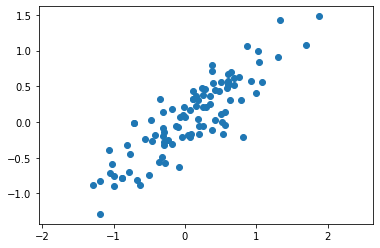

In [362]:
mean = [0, 0]

cov = [[0.4, 0.3], 
       [0.3, 0.3]]


x, y = np.random.multivariate_normal(mean, cov, 100).T 


plt.plot(x, y, 'o')
plt.axis('equal')
plt.show()

### Linear Regression

In [363]:
proportion = int(len(x) * 0.7)
x_train = x[:proportion]
y_train = y[:proportion]

x_test = x[proportion:]
y_test = y[proportion:]

In [364]:
n = len(x_train)
alpha = 0.01
stopper = 1000

#a_0 = np.zeros((n,1))
#a_1 = np.zeros((n,1))

a_0 = 0
a_1 = 0

In [365]:
epochs = 0
while(epochs < stopper):
    y_pred = a_0 + a_1 * x_train
    error = y_pred - y_train
    mean_sq_er = np.sum(error ** 2) / n
    a_0 = a_0 - alpha * 2 * np.sum(error) / n
    a_1 = a_1 - alpha * 2 * np.sum(error * x_train) / n
    epochs += 1
    if (epochs%100 == 0):
        print(mean_sq_er)

0.1173011226915058
0.08656203309704455
0.08120430234210871
0.08026661099236788
0.0801024343103408
0.08007368816365347
0.08006865490328686
0.08006777361233856
0.08006761930405619
0.08006759228568487


R2 Score: 0.7998681082902571


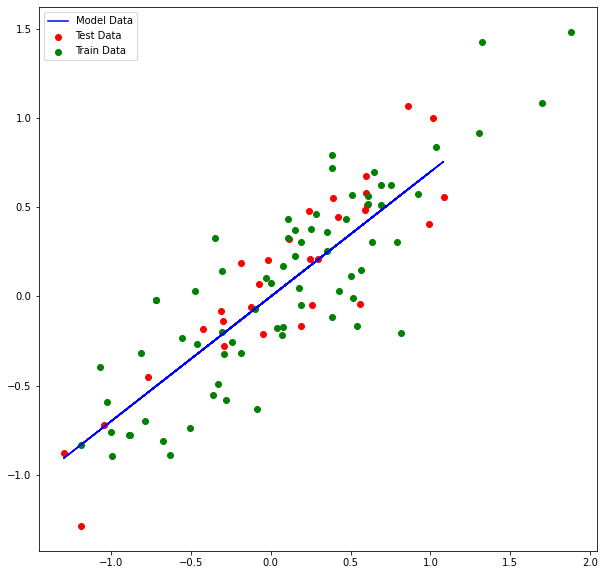

In [369]:
from sklearn.metrics import r2_score

y_prediction = a_0 + a_1 * x_test
print('R2 Score:',r2_score(y_test,y_prediction))

plt.figure(figsize=(10,10))

plt.plot(x_test,y_prediction,color='blue',label='Line of Best Fit')
plt.scatter(x_test,y_test,color='red',label='Test Data')
plt.scatter(x_train,y_train,color='green',label='Train Data')

plt.legend()
plt.show()